## Unsupervised Learning: KMeans Clustering (Iris dataset)

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand
---

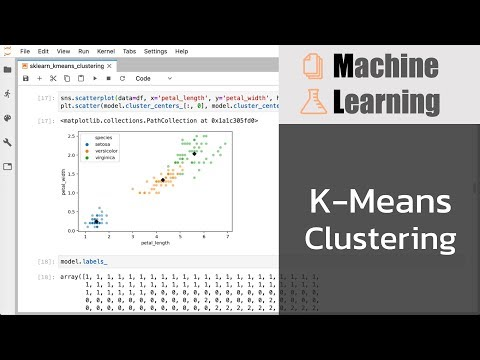

In [32]:
from IPython.display import YouTubeVideo
YouTubeVideo('VyjdyymF0NY', width=720, height=405)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [34]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


In [35]:
pd.Timestamp.now()

Timestamp('2022-11-05 17:54:48.994392')

In [36]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,virginica
42,4.4,3.2,1.3,0.2,setosa
109,7.2,3.6,6.1,2.5,virginica
105,7.6,3.0,6.6,2.1,virginica
44,5.1,3.8,1.9,0.4,setosa
71,6.1,2.8,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
63,6.1,2.9,4.7,1.4,versicolor
94,5.6,2.7,4.2,1.3,versicolor


In [37]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [38]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

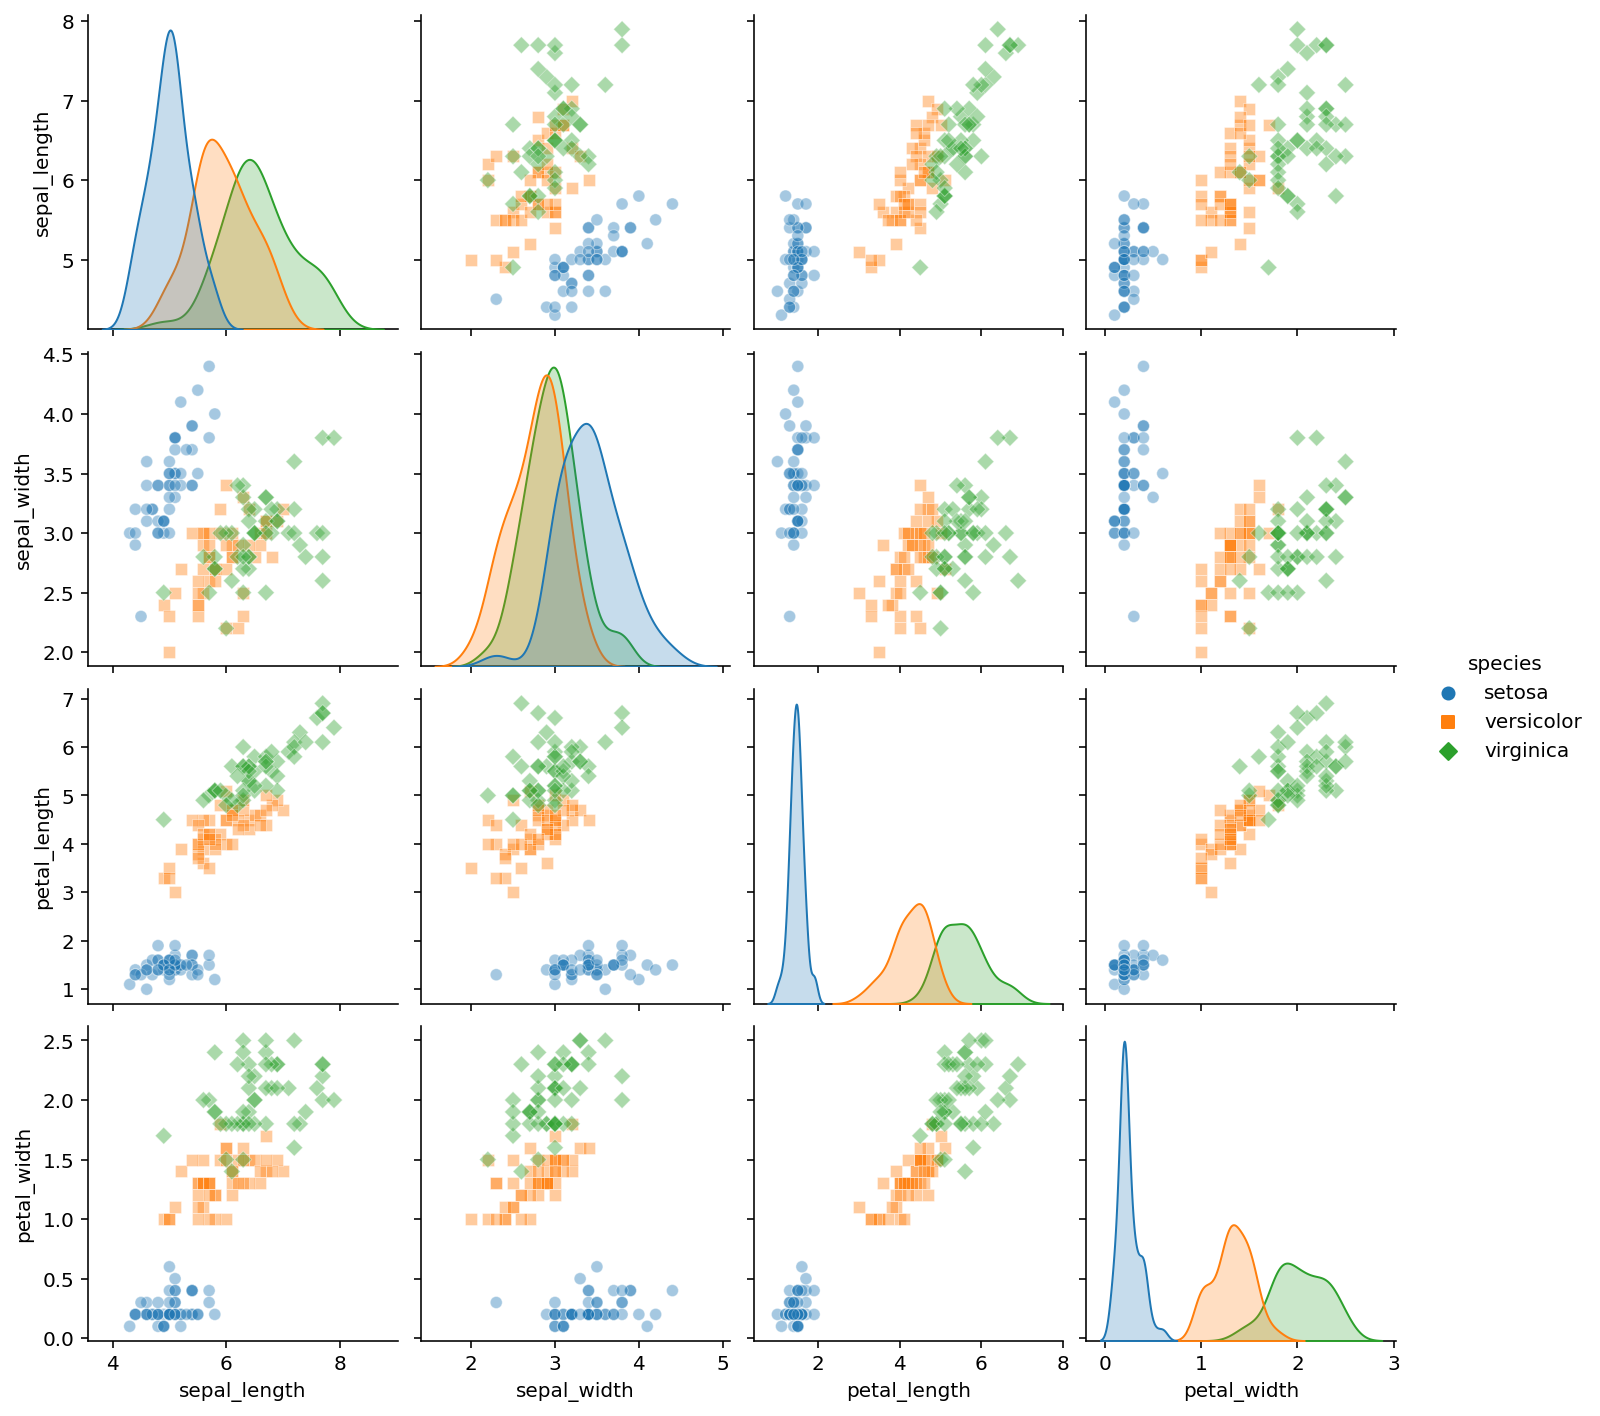

In [39]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
             markers=['o', 's', 'D'],
             plot_kws={'alpha': .4});

# Scikit-learn: KMeans Clustering

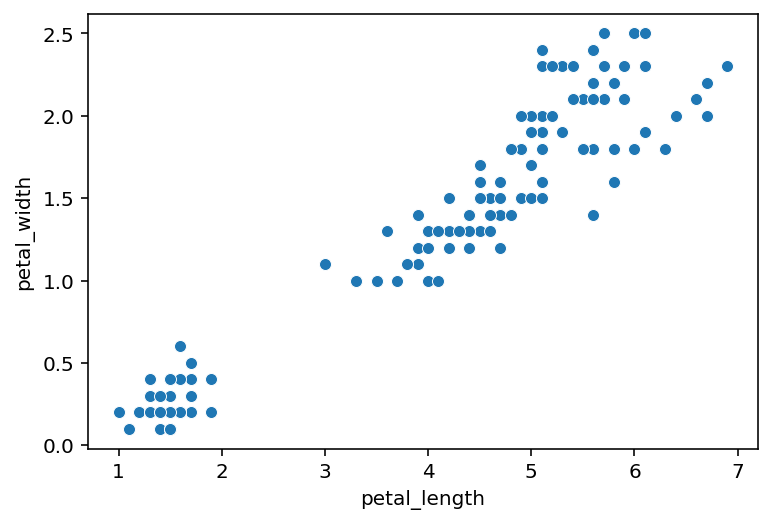

In [40]:
sns.scatterplot(data=df, x='petal_length', y='petal_width');

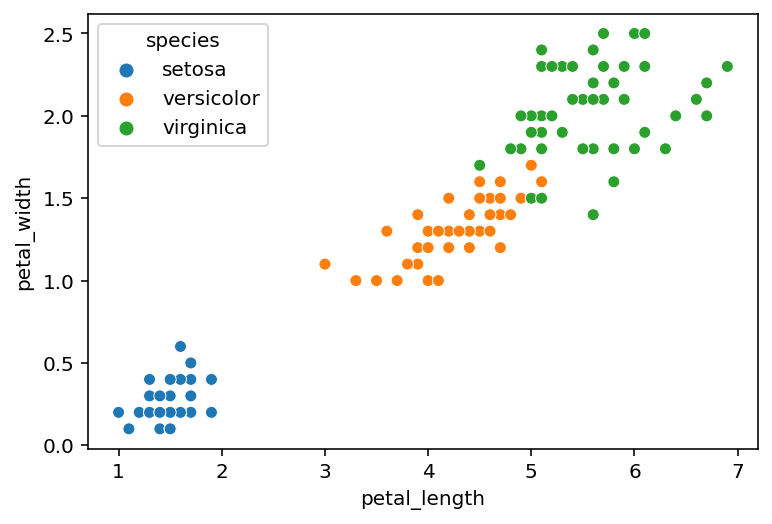

In [41]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species');

In [42]:
rx=np.random.uniform(1, 7, 3)
rx

array([6.63593381, 1.75919457, 6.49835091])

In [43]:
ry=np.random.uniform(0, 2.5, 3)
ry

array([0.11517445, 1.89001105, 1.77020051])

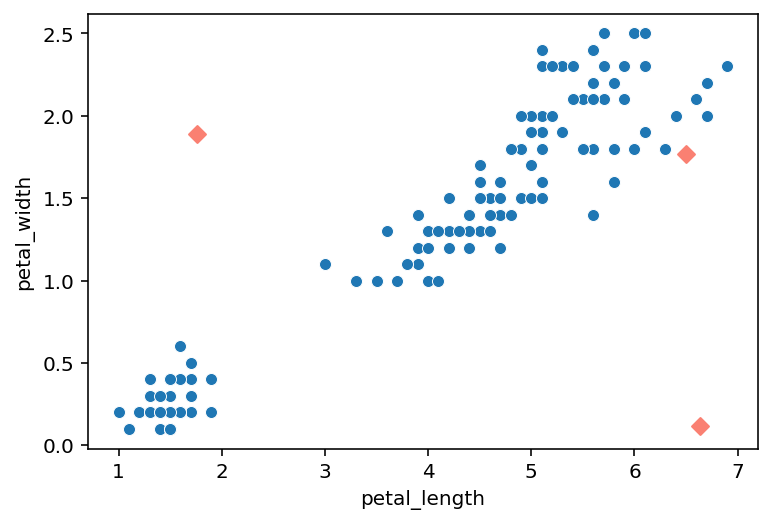

In [44]:
# sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
sns.scatterplot(data=df, x='petal_length', y='petal_width')

plt.scatter(rx, ry, color='salmon', marker='D');

In [45]:
from sklearn.cluster import KMeans

In [46]:
model=KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [47]:
X=df[['petal_length', 'petal_width']]
model.fit(X)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [48]:
model.cluster_centers_ # centroids

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [49]:
model.cluster_centers_[:, 0]

array([5.59583333, 1.464     , 4.26923077])

In [50]:
model.cluster_centers_[:, 1]

array([2.0375    , 0.244     , 1.34230769])

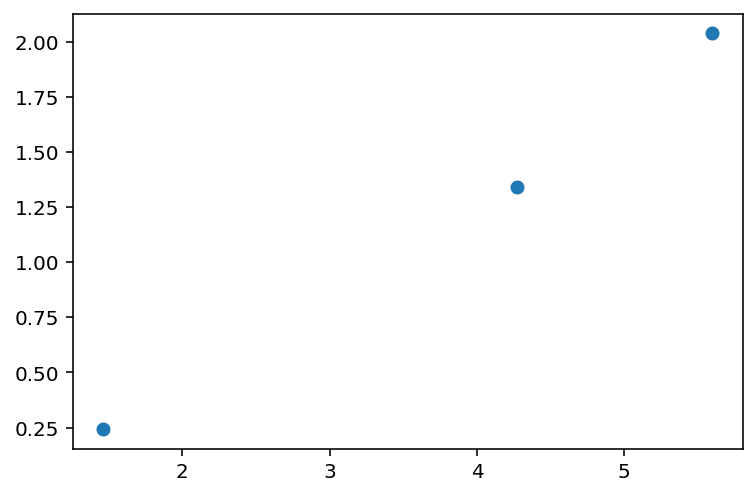

In [51]:
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1]);
# (5.59583333 , 2.0375) , (1.464 , 0.244) , (4.26923077 , 1.34230769)

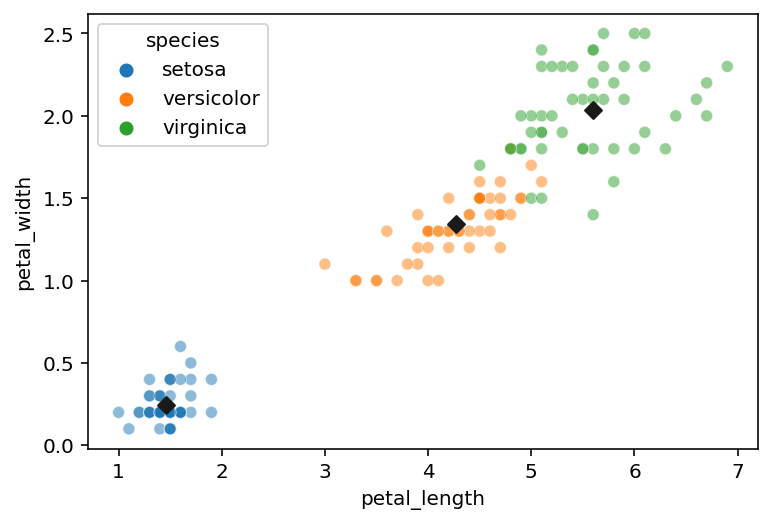

In [52]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', alpha=.5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D');

In [53]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
df['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [55]:
df['cluster']=model.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [56]:
pd.crosstab(df['species'], df['cluster'])

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


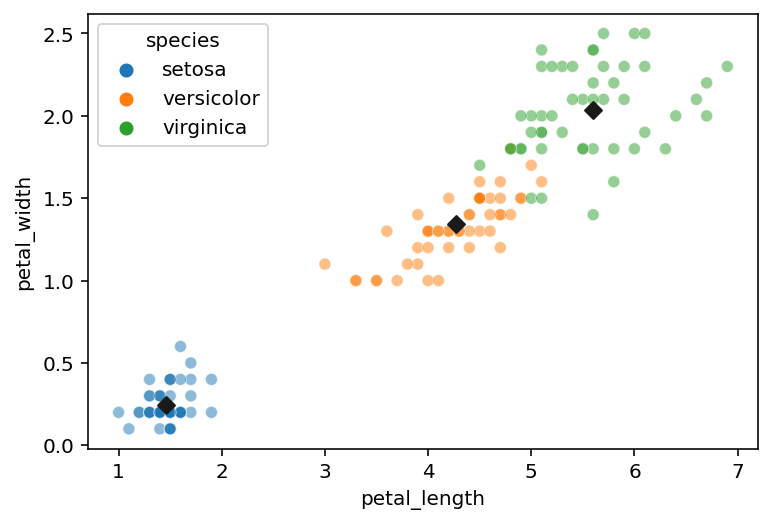

In [57]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', alpha=.5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D');

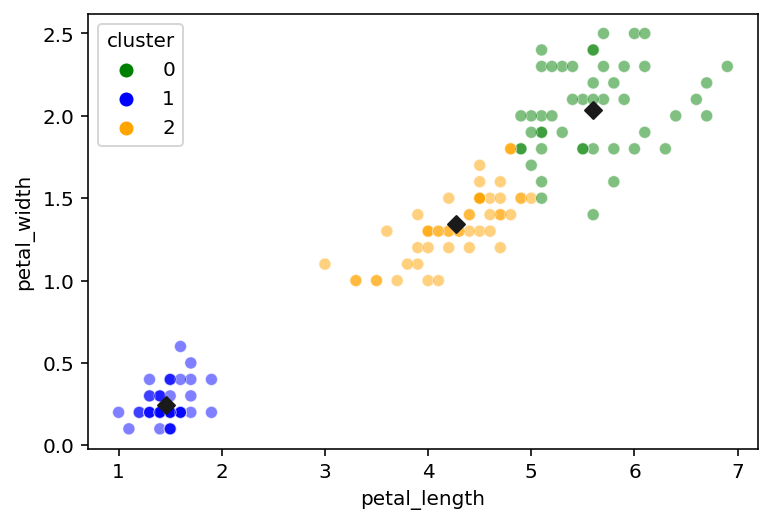

In [58]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='cluster', alpha=.5, palette=['green', 'blue', 'orange'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D');

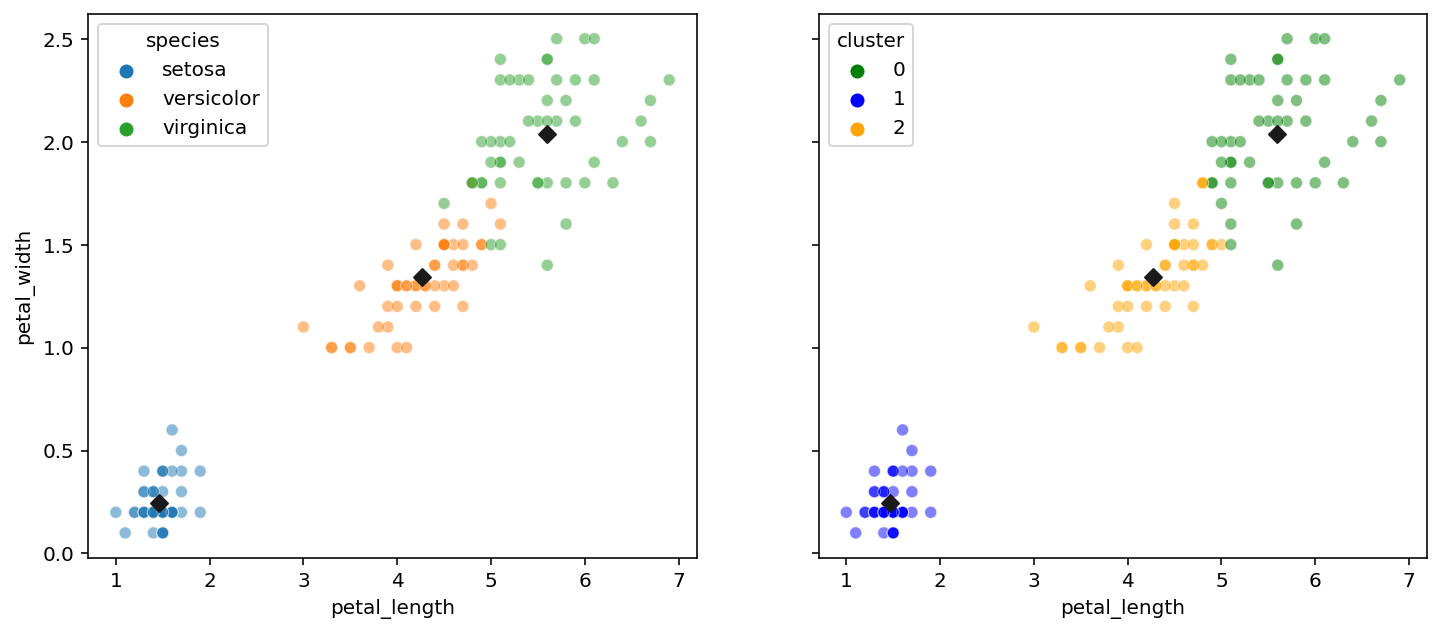

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)
# g1 = Actual  
g1=sns.scatterplot(data=df,x='petal_length', y='petal_width', hue='species', alpha=.5, ax=ax[0]) # ax[0] = รูปซ้าย
g1.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D')
#g2 = Predicted 
g2=sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='cluster', 
                   alpha=.5, palette=['green', 'blue', 'orange'], ax=ax[1]) # ax[0] = รูปขวา
g2.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D');

In [60]:
pd.crosstab(df['species'], df['cluster'])

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


In [61]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [62]:
model.predict(
    [
        [1.5, .3],
        [4.5, 1.3],
        [6, 2]
    ]
)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 2, 0])